In [23]:
import warnings

# Ignore all warning messages
warnings.filterwarnings("ignore")

## 1. Data Obtention

In [2]:
import pandas as pd

# Read csv
df = pd.read_csv("ds_salaries.csv")
# Configure Pandas options to display all rows and columns
#pd.set_option('display.max_rows', None)
df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M
...,...,...,...,...,...,...,...,...,...,...,...
3750,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
3751,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
3752,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
3753,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L


## 2. Data Cleaning

In [3]:
# Remove unnecessary columns
df = df.drop(['salary_currency', 'salary'], axis=1)
# Convert work_year to date
df['work_year'] = df['work_year'].astype(str)
df['work_year'] = df['work_year'] + '-01-01'
df['work_year'] = pd.to_datetime(df['work_year'])
# Create a column with only year
df['year'] = df['work_year'].dt.year
df

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,year
0,2023-01-01,SE,FT,Principal Data Scientist,85847,ES,100,ES,L,2023
1,2023-01-01,MI,CT,ML Engineer,30000,US,100,US,S,2023
2,2023-01-01,MI,CT,ML Engineer,25500,US,100,US,S,2023
3,2023-01-01,SE,FT,Data Scientist,175000,CA,100,CA,M,2023
4,2023-01-01,SE,FT,Data Scientist,120000,CA,100,CA,M,2023
...,...,...,...,...,...,...,...,...,...,...
3750,2020-01-01,SE,FT,Data Scientist,412000,US,100,US,L,2020
3751,2021-01-01,MI,FT,Principal Data Scientist,151000,US,100,US,L,2021
3752,2020-01-01,EN,FT,Data Scientist,105000,US,100,US,S,2020
3753,2020-01-01,EN,CT,Business Data Analyst,100000,US,100,US,L,2020


## 3. Descriptive statistics

#### Top 10 Salaries 

In [4]:
# Sort by 'salary_in_usd'
df = df.sort_values(by='salary_in_usd', ascending=False)
display(df.head(10))

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,year
3522,2020-01-01,MI,FT,Research Scientist,450000,US,0,US,M,2020
2011,2022-01-01,MI,FT,Data Analyst,430967,GB,0,GB,M,2022
528,2023-01-01,SE,FT,AI Scientist,423834,IL,0,IL,L,2023
3747,2021-01-01,MI,FT,Applied Machine Learning Scientist,423000,US,50,US,L,2021
3675,2021-01-01,EX,CT,Principal Data Scientist,416000,US,100,US,S,2021
3750,2020-01-01,SE,FT,Data Scientist,412000,US,100,US,L,2020
3463,2022-01-01,SE,FT,Data Analytics Lead,405000,US,100,US,L,2022
1288,2023-01-01,SE,FT,Data Analyst,385000,US,0,US,M,2023
3468,2022-01-01,SE,FT,Applied Data Scientist,380000,US,100,US,L,2022
649,2023-01-01,SE,FT,Data Architect,376080,US,100,US,M,2023


#### Salary by Year 

In [5]:
df_by_year = df.groupby("year").agg({'salary_in_usd': ['mean', 'max', 'min', 'std', 'count']})
df_by_year.rename(columns={'mean': 'average_salary', 'max': 'max_salary', 'min': 'min_salary'}, inplace=True)

# Remove one level of the multi-index from columns
df_by_year.columns = df_by_year.columns.droplevel(0)
df_by_year

,average_salary,max_salary,min_salary,std,count
year,,,,,
2020,92302.631579,450000,5707,82370.048002,76
2021,94087.208696,423000,5409,68600.465120,230
2022,133338.620793,430967,5132,58947.155520,1664
2023,149045.541176,423834,7000,61307.711442,1785


#### Salary by Company Location 

In [6]:
df_by_company_location = df.groupby("company_location").agg({'salary_in_usd': ['mean', 'max', 'min', 'std', 'count']})
df_by_company_location.rename(columns={'mean': 'average_salary', 'max': 'max_salary', 'min': 'min_salary'}, inplace=True)
df_by_company_location = df_by_company_location.sort_values(by=('salary_in_usd', 'average_salary'), ascending=False)
df_by_company_location.columns = df_by_company_location.columns.droplevel(0)
display(df_by_company_location)

,average_salary,max_salary,min_salary,std,count
company_location,,,,,
IL,271446.500000,423834,119059,215508.469236,2
PR,167500.000000,200000,135000,37527.767497,4
US,151822.009539,450000,5679,56018.538978,3040
RU,140333.333333,230000,85000,78360.279053,3
CA,131917.689655,275000,15000,61182.471960,87
...,...,...,...,...,...
VN,12000.000000,12000,12000,NaN,1
AL,10000.000000,10000,10000,NaN,1
MA,10000.000000,10000,10000,NaN,1


#### Salaries in Mexico

In [7]:
df[df['company_location']=='MX'].sort_values('salary_in_usd', ascending=False)

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,year
2009,2022-01-01,SE,FT,Machine Learning Engineer,255000,MX,100,MX,M,2022
2010,2022-01-01,SE,FT,Machine Learning Engineer,185000,MX,100,MX,M,2022
979,2023-01-01,SE,FT,Data Science Manager,150000,MX,100,MX,M,2023
980,2023-01-01,SE,FT,Data Science Manager,90000,MX,100,MX,M,2023
837,2023-01-01,MI,FT,Data Engineer,72000,MX,100,MX,M,2023
838,2023-01-01,MI,FT,Data Engineer,60000,MX,100,MX,M,2023
3225,2022-01-01,SE,FT,Data Science Engineer,60000,AR,100,MX,L,2022
1308,2023-01-01,MI,FT,Machine Learning Engineer,36000,MX,100,MX,S,2023
3594,2020-01-01,SE,FT,Data Engineer,33511,MX,0,MX,S,2020
2546,2022-01-01,MI,FT,Data Scientist,30000,MX,100,MX,L,2022


#### Salary by Experience Level 

In [8]:
df_by_experience_level = df.groupby("experience_level").agg({'salary_in_usd': ['mean', 'max', 'min', 'std', 'count']})
df_by_experience_level.rename(columns={'mean': 'average_salary', 'max': 'max_salary', 'min': 'min_salary'}, inplace=True)
df_by_experience_level = df_by_experience_level.sort_values(by=('salary_in_usd', 'average_salary'), ascending=False)
df_by_experience_level.columns = df_by_experience_level.columns.droplevel(0)
display(df_by_experience_level)

,average_salary,max_salary,min_salary,std,count
experience_level,,,,,
EX,194930.929825,416000,15000,70661.929661,114
SE,153051.071542,423834,8000,56896.263954,2516
MI,104525.939130,450000,5132,54387.685128,805
EN,78546.284375,300000,5409,52225.424309,320


#### Salary by Company Size

In [9]:
df_by_company_size = df.groupby("company_size").agg({'salary_in_usd': ['mean', 'max', 'min', 'std', 'count']})
df_by_company_size.rename(columns={'mean': 'average_salary', 'max': 'max_salary', 'min': 'min_salary'}, inplace=True)
df_by_company_size = df_by_company_size.sort_values(by=('salary_in_usd', 'average_salary'), ascending=False)
df_by_company_size.columns = df_by_company_size.columns.droplevel(0)
display(df_by_company_size.head(20))

,average_salary,max_salary,min_salary,std,count
company_size,,,,,
M,143130.548367,450000,5132,58992.813382,3153
L,118300.982379,423834,5409,75832.391505,454
S,78226.682432,416000,5679,61955.141792,148


#### Salary by Remote Ratio 

In [10]:
df_by_remote_ratio = df.groupby("remote_ratio").agg({'salary_in_usd': ['mean', 'max', 'min', 'std', 'count']})
df_by_remote_ratio.rename(columns={'mean': 'average_salary', 'max': 'max_salary', 'min': 'min_salary'}, inplace=True)
df_by_remote_ratio.columns = df_by_remote_ratio.columns.droplevel(0)
display(df_by_remote_ratio)

,average_salary,max_salary,min_salary,std,count
remote_ratio,,,,,
0,144316.202288,450000,5882,59799.970864,1923
50,78400.687831,423000,5409,61326.133522,189
100,136481.452830,416000,5132,63373.507699,1643


#### Salary by Job Title

In [11]:
df_by_job_title = df.groupby("job_title").agg({'salary_in_usd': ['mean', 'max', 'min', 'std', 'count']})
df_by_job_title.rename(columns={'mean': 'average_salary', 'max': 'max_salary', 'min': 'min_salary'}, inplace=True)
df_by_job_title = df_by_job_title.sort_values(by=('salary_in_usd', 'average_salary'), ascending=False)
df_by_job_title.columns = df_by_job_title.columns.droplevel(0)
display(df_by_job_title)

,average_salary,max_salary,min_salary,std,count
job_title,,,,,
Data Science Tech Lead,375000.000,375000,375000,NaN,1
Cloud Data Architect,250000.000,250000,250000,NaN,1
Data Lead,212500.000,225000,200000,17677.669530,2
Data Analytics Lead,211254.500,405000,17509,273997.513749,2
Principal Data Scientist,198171.125,416000,85847,99306.052833,8
...,...,...,...,...,...
Autonomous Vehicle Technician,26277.500,45555,7000,27262.501949,2
3D Computer Vision Researcher,21352.250,50000,5409,20046.470685,4
Staff Data Analyst,15000.000,15000,15000,NaN,1


## 4. Data visualization

#### Job Offer and Salaries by Year

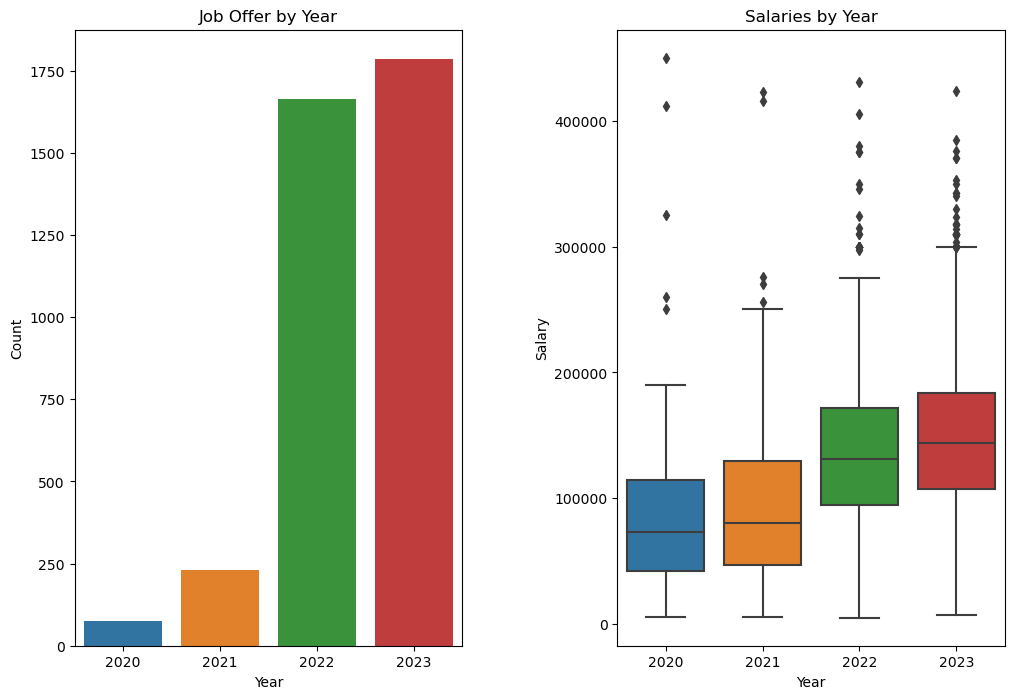

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure with 4 subplots
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 8))

# Adjust horizontal spacing between subplots
plt.subplots_adjust(wspace=0.4)

# Job Offers by Year - Bar Plot
sns.barplot(x=df_by_year.index, y='count', data=df_by_year, ax=ax1)
ax1.set_title('Job Offer by Year')
ax1.set_xlabel('Year')
ax1.set_ylabel('Count')

# Salaries by Year - Box Plot
sns.boxplot(x='year', y='salary_in_usd', data=df, ax=ax2)
ax2.set_title('Salaries by Year')
ax2.set_xlabel('Year')
ax2.set_ylabel('Salary')

plt.show()

#### Job Offer and Salaries by Experience Level

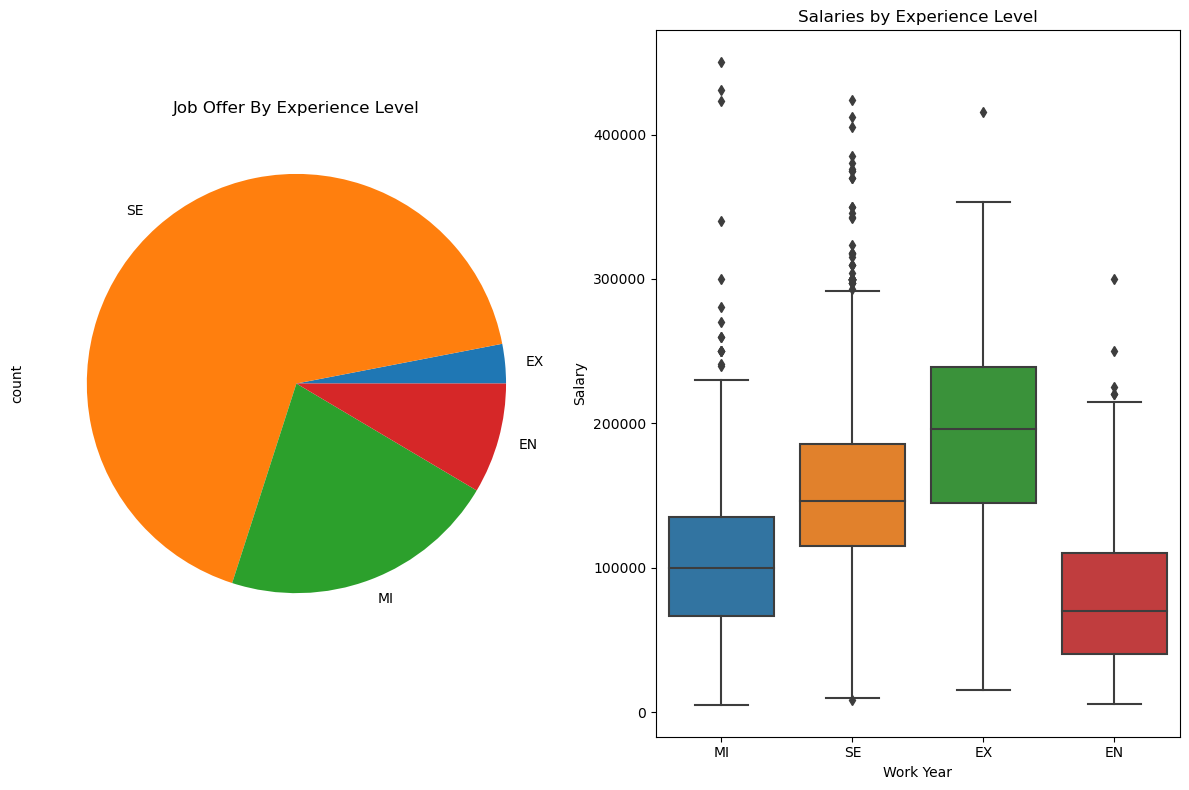

In [13]:
# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 8))

# Job Offer by Experience Level - Pie Chart
df_by_experience_level['count'].plot(title='Job Offer By Experience Level', kind='pie',ax=ax1)

# Salaries by Experience Level - Box Plot
sns.boxplot(x='experience_level', y='salary_in_usd', data=df, ax=ax2)
ax2.set_title('Salaries by Experience Level')
ax2.set_xlabel('Work Year')
ax2.set_ylabel('Salary')


plt.tight_layout()
plt.show()

#### Top 5 Countries with the Most Job Offer

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'US'),
  Text(1, 0, 'GB'),
  Text(2, 0, 'CA'),
  Text(3, 0, 'ES'),
  Text(4, 0, 'IN')])

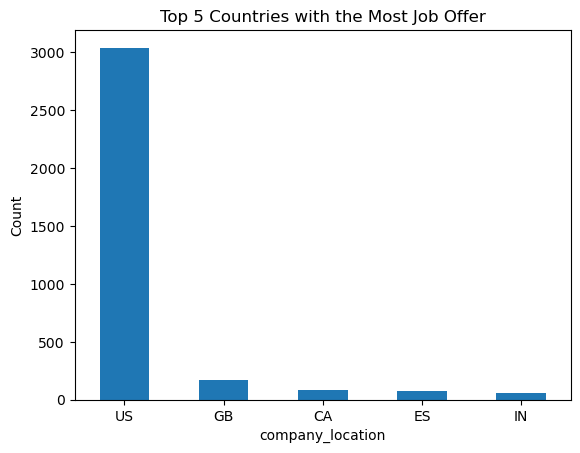

In [14]:
df_by_company_location = df_by_company_location.sort_values('count', ascending=False)

# Top 5 Contires with the Most Job Offer - Bar Plot
df_by_company_location['count'].head(5).plot(title='Top 5 Countries with the Most Job Offer', kind='bar', ylabel='Count')
plt.xticks(rotation=0)

## 5. Statistic Test 

#### Apply ANOVA to compare average salaries between company locations.

ANOVA Result:
Statistic: 76.5127587733052
p-value: 1.2695190282238148e-179


<AxesSubplot:xlabel='company_location', ylabel='salary_in_usd'>

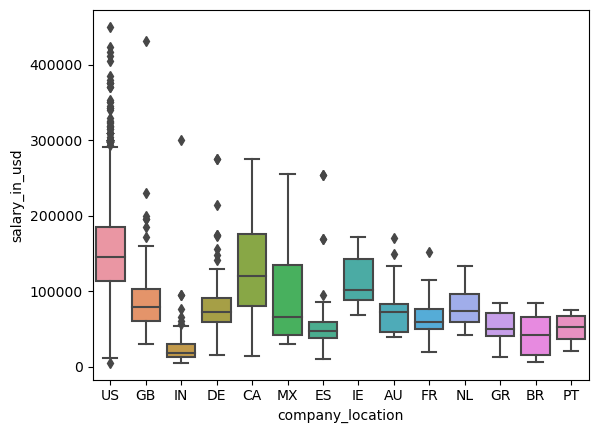

In [15]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import f_oneway

# Get top 14 countries with the most job offer
df_by_company_location.reset_index(inplace=True)
anova_test_df = df[df['company_location'].isin(df_by_company_location['company_location'].head(14))]

anova_test_df = anova_test_df[['company_location', 'salary_in_usd']]

# Perform ANOVA
anova_result = f_oneway(*[anova_test_df['salary_in_usd'][anova_test_df['company_location'] == location] for location in anova_test_df['company_location'].unique()])

# Display ANOVA result
print("ANOVA Result:")
print(f"Statistic: {anova_result.statistic}")
print(f"p-value: {anova_result.pvalue}")

# Plot the data
sns.boxplot(x='company_location', y='salary_in_usd', data=anova_test_df)

## 6. Linear Models

#### Linear Regression for Average Salary by Company Location

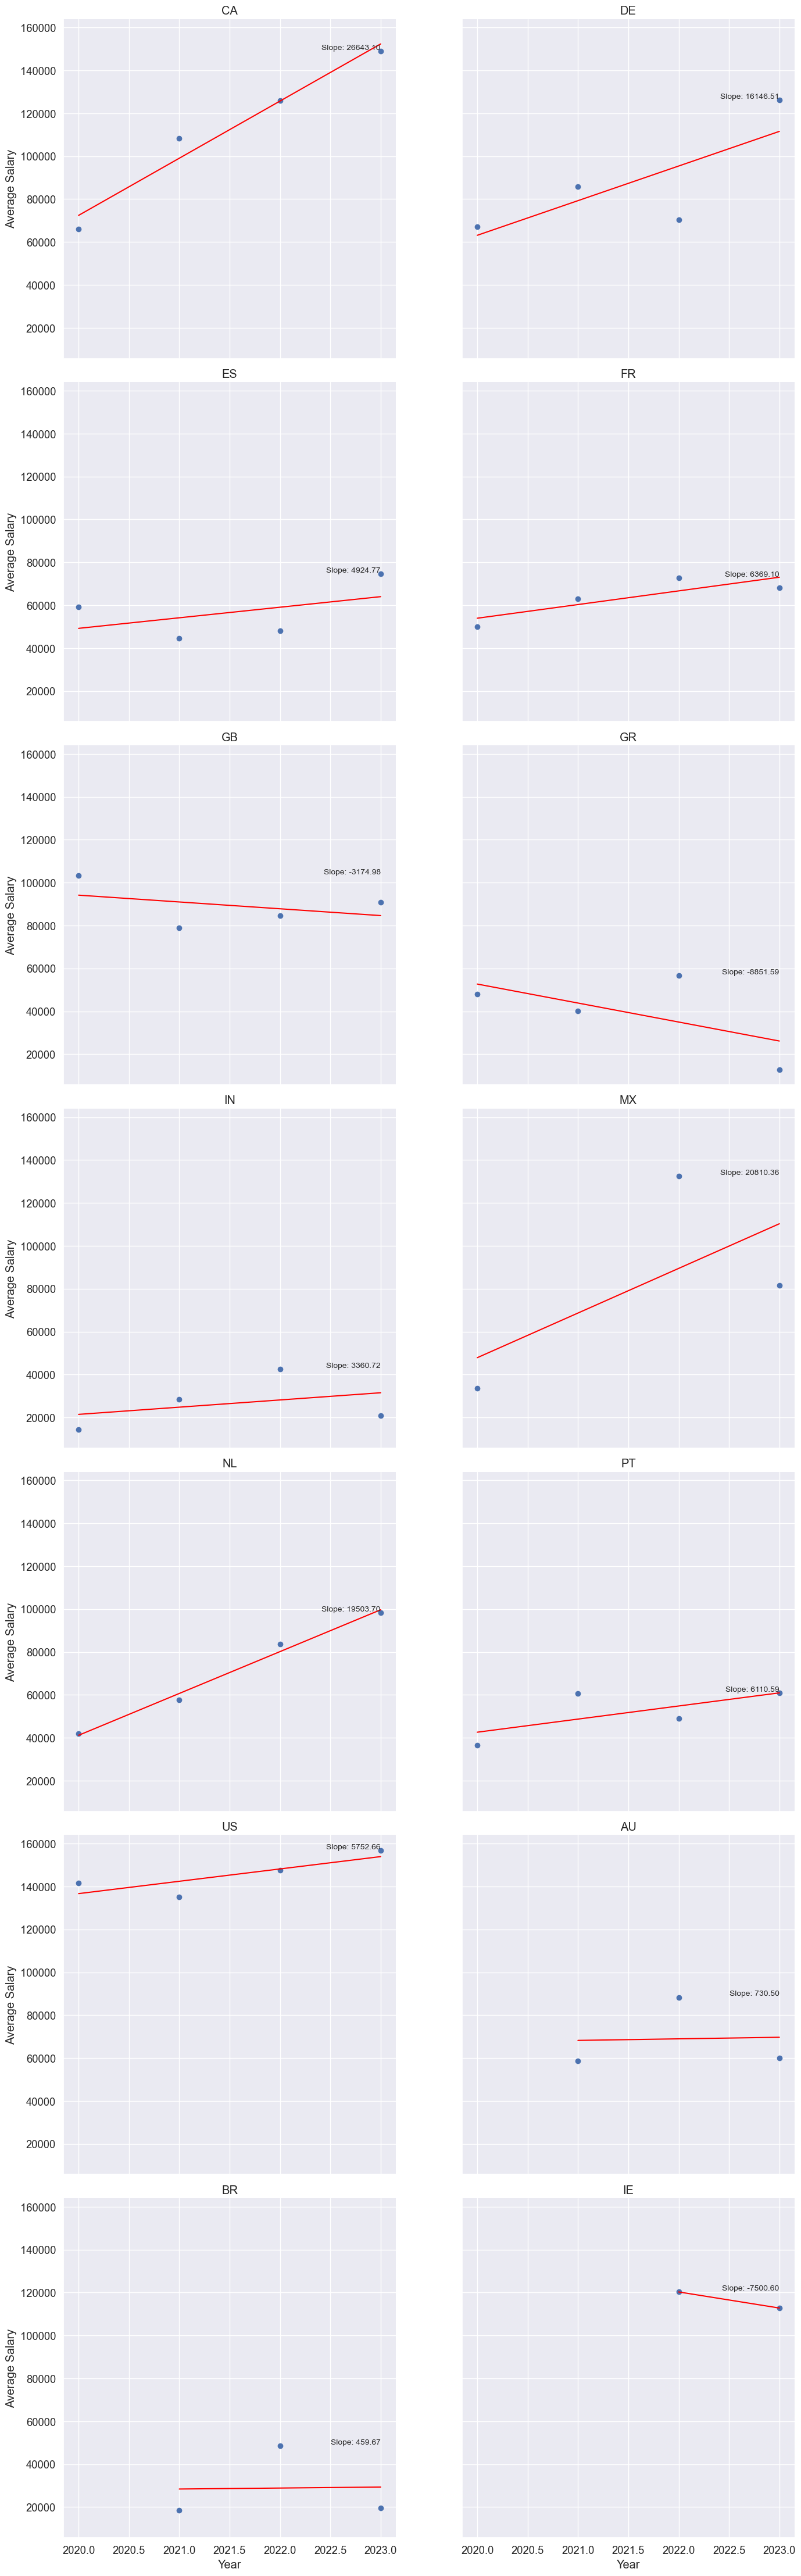

In [16]:
from sklearn.linear_model import LinearRegression

sns.set(font_scale=1.2)

# Get top 14 countries with most job offers
year_and_company_location_df = df[df['company_location'].isin(df_by_company_location['company_location'].head(14))].groupby(["year", "company_location"]).agg({'salary_in_usd': ['mean']})
year_and_company_location_df.rename(columns={'mean': 'average_salary'}, inplace=True)
year_and_company_location_df.columns = year_and_company_location_df.columns.droplevel(0)
year_and_company_location_df.reset_index(inplace=True)

# Create subplots for each company location
g = sns.FacetGrid(year_and_company_location_df, col="company_location", col_wrap=2, height=7, margin_titles=True)

# Define the function for linear regression and plot the line
def plot_regression_line(x, y, **kwargs):
    model = LinearRegression()
    model.fit(x.values.reshape(-1, 1), y)
    slope = model.coef_[0]
    x_pred = pd.Series([x.min(), x.max()])
    y_pred = model.predict(x_pred.values.reshape(-1, 1))
    plt.plot(x_pred, y_pred, color='red')
    plt.text(x.max(), y.max(), f'Slope: {slope:.2f}', fontsize=10, verticalalignment='bottom', horizontalalignment='right')

# Map the function to each subplot
g.map(plot_regression_line, "year", "average_salary")

# Add scatter plots to each subplot
g.map(plt.scatter, "year", "average_salary")

# Adjust layout
g.set_axis_labels("Year", "Average Salary")
g.set_titles(col_template="{col_name}")
g.fig.subplots_adjust(top=0.9, wspace=0.2)

# Show the plot
plt.show()


#### Linear Regression for Average Salary by Experience Level

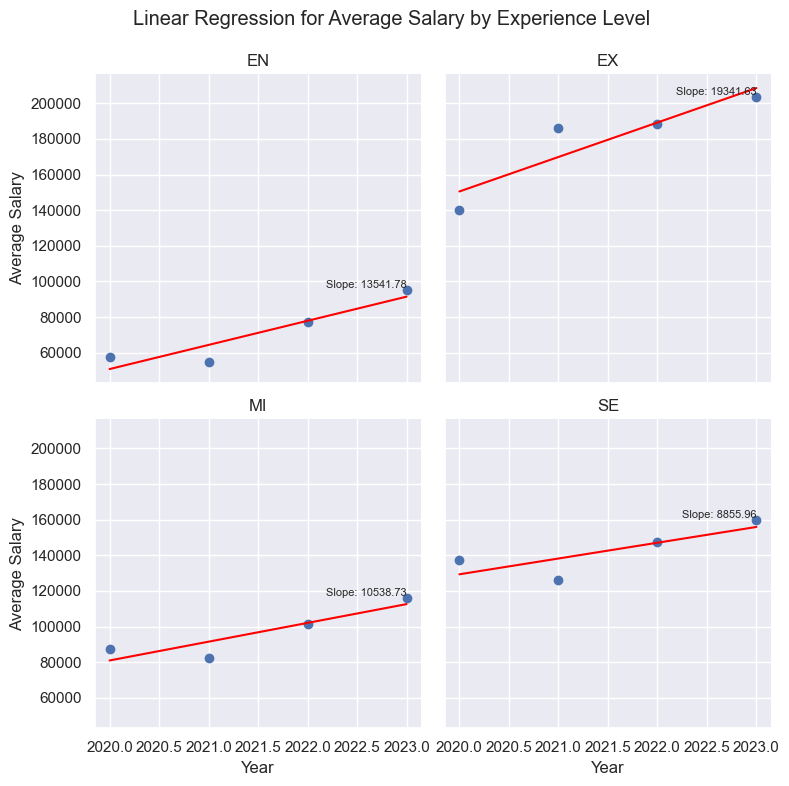

In [17]:
sns.set(font_scale=1.0)

year_and_experience_level_df = df.groupby(["year","experience_level"]).agg({'salary_in_usd': ['mean']})
year_and_experience_level_df.rename(columns={'mean': 'average_salary'}, inplace=True)
year_and_experience_level_df.columns = year_and_experience_level_df.columns.droplevel(0)
year_and_experience_level_df.reset_index(inplace=True)

# Create subplots for each experience level
g = sns.FacetGrid(year_and_experience_level_df, col="experience_level", col_wrap=2, height=4, margin_titles=True)

# Define the function for linear regression and plot the line
def plot_regression_line(x, y, **kwargs):
    model = LinearRegression()
    model.fit(x.values.reshape(-1, 1), y)
    slope = model.coef_[0]
    x_pred = pd.Series([x.min(), x.max()])
    y_pred = model.predict(x_pred.values.reshape(-1, 1))
    plt.plot(x_pred, y_pred, color='red')
    plt.text(x.max(), y.max(), f'Slope: {slope:.2f}', fontsize=8, verticalalignment='bottom', horizontalalignment='right')

# Map the function to each subplot
g.map(plot_regression_line, "year", "average_salary")

# Add scatter plots to each subplot
g.map(plt.scatter, "year", "average_salary")

# Adjust layout
g.set_axis_labels("Year", "Average Salary")
g.set_titles(col_template="{col_name}")
plt.subplots_adjust(top=0.9)
g.fig.suptitle("Linear Regression for Average Salary by Experience Level")

# Show the plot
plt.show()

## 7. Data Classification (k-neighbours)

#### Classificate new salaries into a experience level

In [18]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Features
X = df[['salary_in_usd']]  

# Target variable
y = df['experience_level']  

# Split data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
# Create and train classifier
knn_classifier = KNeighborsClassifier(n_neighbors=300)
knn_classifier.fit(X_train, y_train)

# Make predictions on test split
y_pred = knn_classifier.predict(X_test)

accuracy =  accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.10f}')

# Invented salaries to predict experience level
salaries_to_test = pd.DataFrame([5000, 10000, 50000, 80000, 100000, 150000, 200000])
experience_levels_predictions = knn_classifier.predict(salaries_to_test)

predictions_df = pd.DataFrame({
    'salary_to_test': np.array(salaries_to_test[0]),
    'experience_level_prediction': experience_levels_predictions
})

predictions_df

Accuracy: 0.7243675100


,salary_to_test,experience_level_prediction
0,5000,MI
1,10000,MI
2,50000,MI
3,80000,SE
4,100000,SE
5,150000,SE
6,200000,SE


## 8. Forecasting

#### ANIMA Forecasting for Average Salary by Company Location 

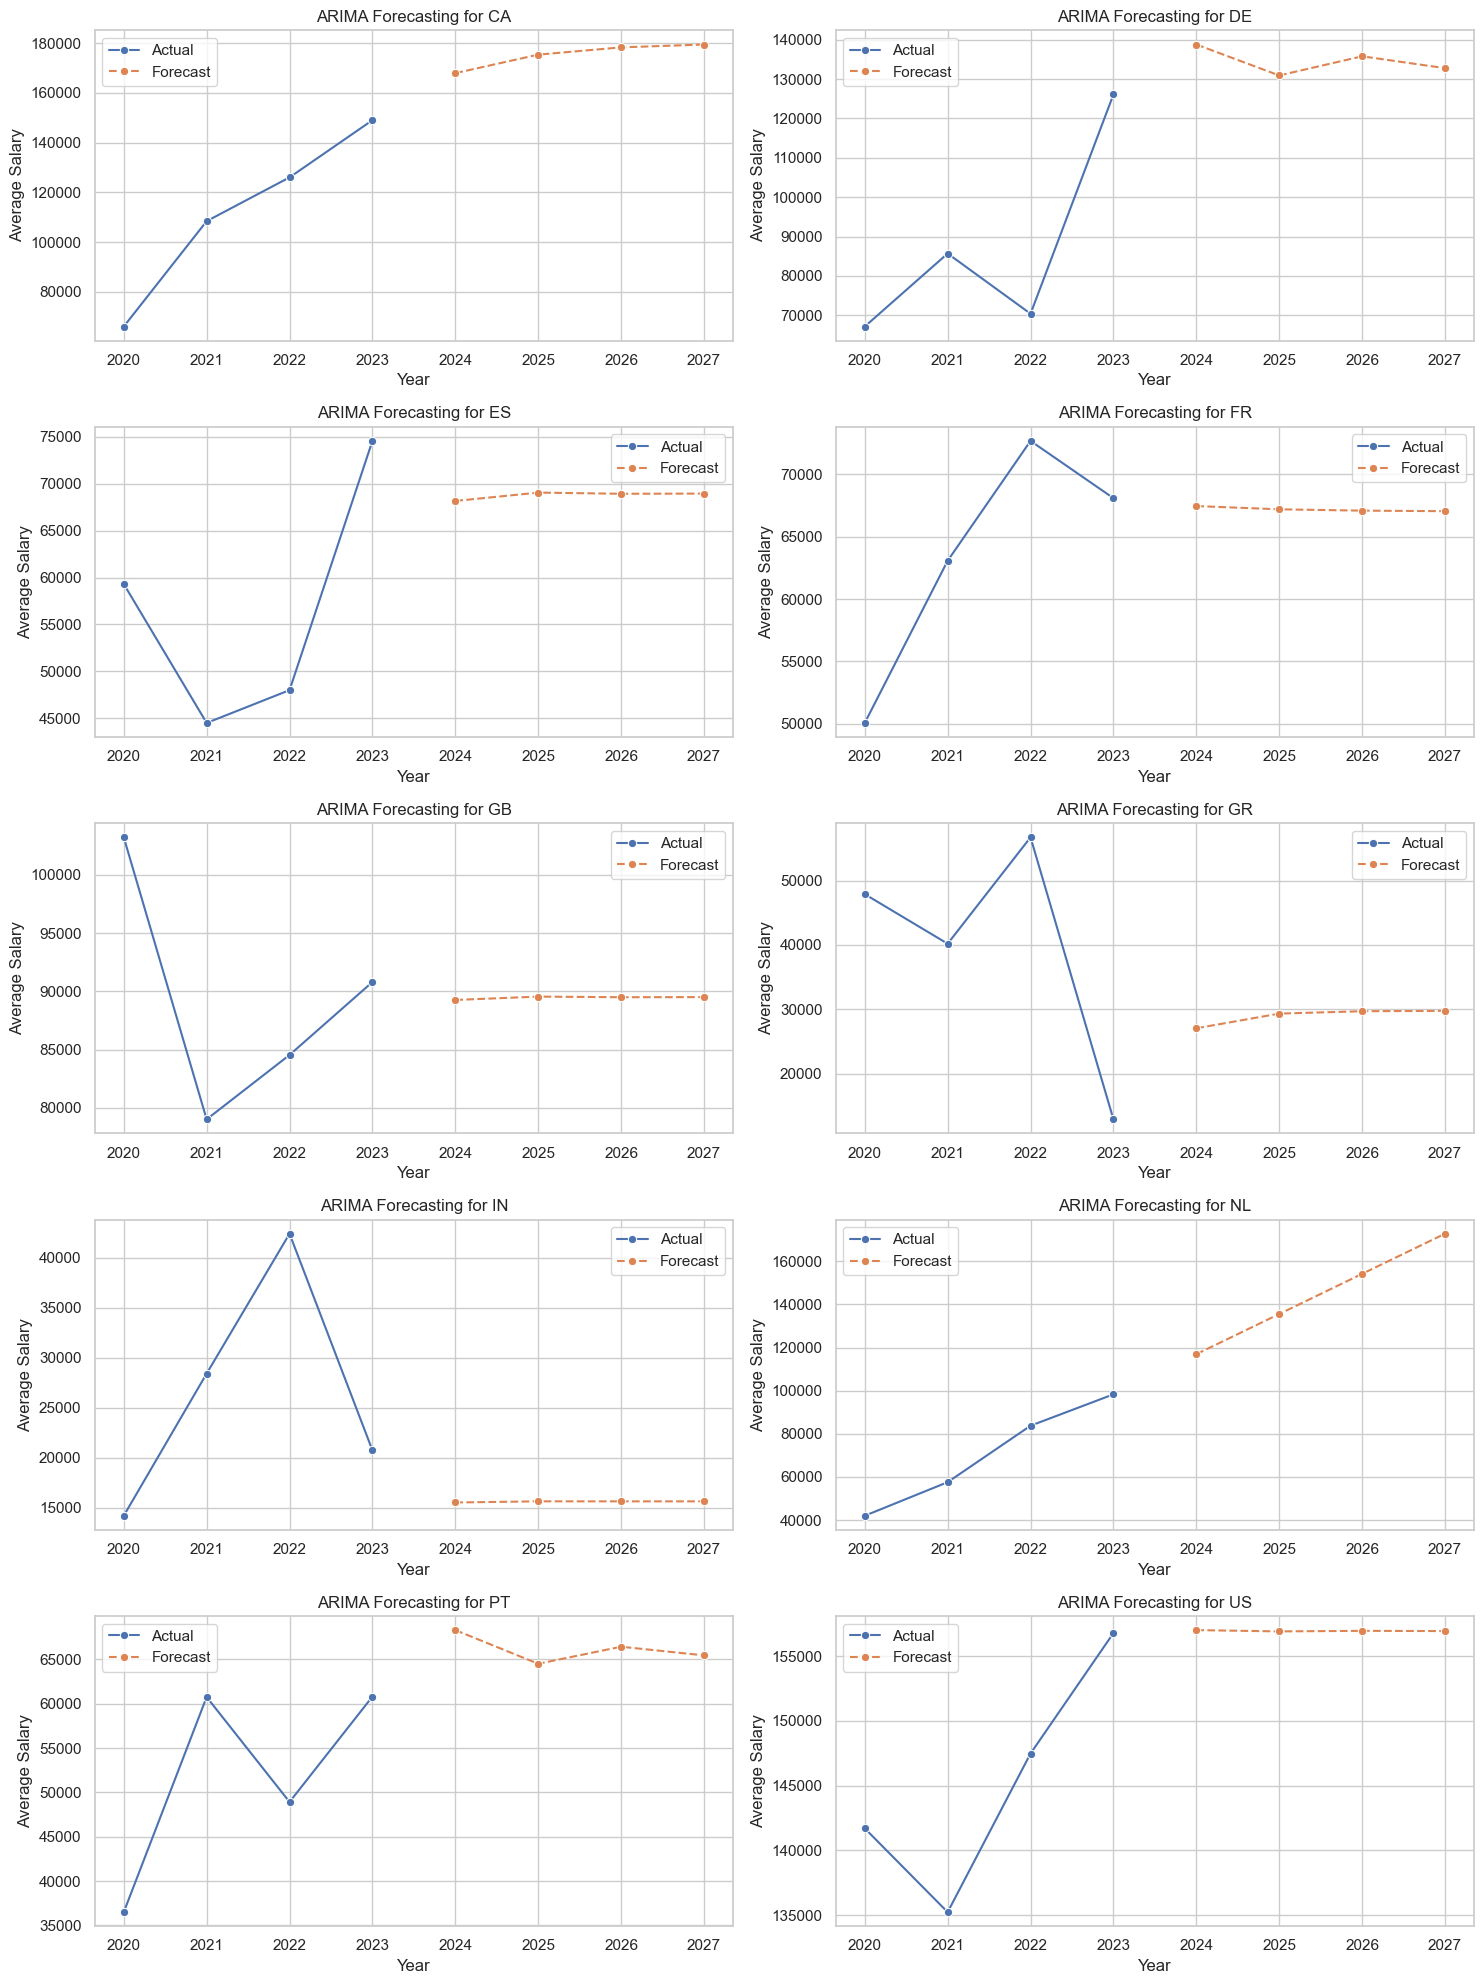

In [24]:
from statsmodels.tsa.arima.model import ARIMA

sns.set(font_scale=1.2)

# Create a pivot table for easy time series analysis
pivot_df = year_and_company_location_df.pivot_table(index='year', columns='company_location', values='average_salary')

# Filter columns with exactly 4 unique values at the index
filtered_columns = pivot_df.columns[pivot_df.nunique() == 4]
pivot_df = pivot_df[filtered_columns]

# Set the Seaborn style
sns.set(style="whitegrid")

# Number of rows and columns for the subplots
n_rows = 5
n_cols = 2

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 20))

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Forecasting using ARIMA for each experience level
for i, country in enumerate(pivot_df.columns):
    time_series = pivot_df[country].dropna()
    
    # Fit ARIMA model
    model = ARIMA(time_series, order=(1, 1, 1))  
    results = model.fit()

    # Forecast future values
    forecast_steps = 4  # Adjust the number of steps as needed
    forecast = results.get_forecast(steps=forecast_steps)
    forecast_index = pd.Index(range(time_series.index.max() + 1, time_series.index.max() + 1 + forecast_steps))

    # Plot the original time series and the forecast
    sns.lineplot(x=time_series.index, y=time_series.values, ax=axes[i], label='Actual', marker='o')
    sns.lineplot(x=forecast_index, y=forecast.predicted_mean, ax=axes[i], label='Forecast', linestyle='dashed', marker='o')

    axes[i].set_title(f'ARIMA Forecasting for {country}')
    axes[i].set_xlabel('Year')
    axes[i].set_ylabel('Average Salary')
    axes[i].legend()

# Adjust layout
plt.tight_layout()
plt.show()

#### ANIMA Forecasting for Average Salary by Experience Level (Entry, Mid, Senior, Expert)

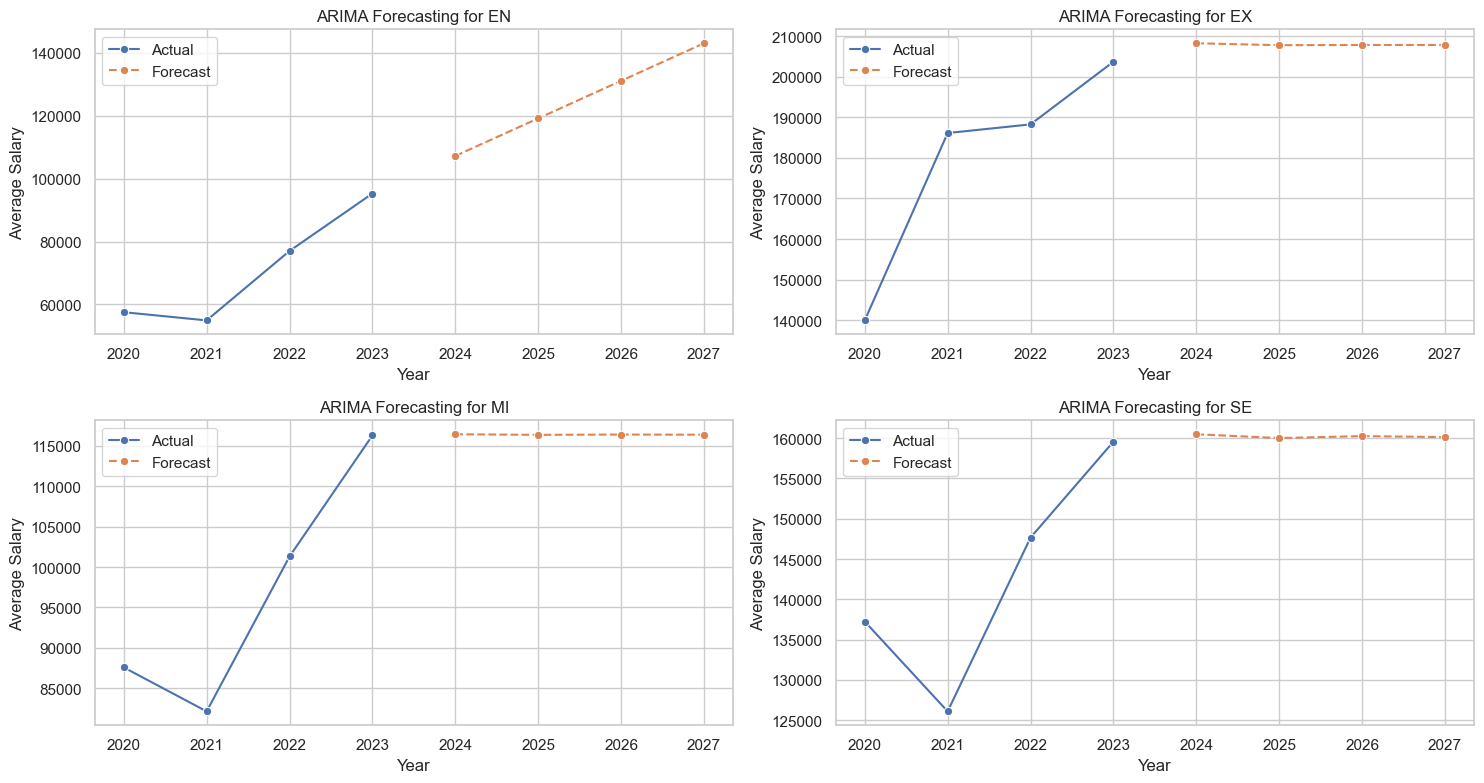

In [25]:
# Create a pivot table for easy time series analysis
pivot_df = year_and_experience_level_df.pivot_table(index='year', columns='experience_level', values='average_salary')

# Number of rows and columns for the subplots
n_rows = 2
n_cols = 2

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 8))

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Forecasting using ARIMA for each experience level
for i, experience_level in enumerate(pivot_df.columns):
    time_series = pivot_df[experience_level].dropna()
    
    # Fit ARIMA model
    model = ARIMA(time_series, order=(1, 1, 1))  
    results = model.fit()

    # Forecast future values
    forecast_steps = 4  # Adjust the number of steps as needed
    forecast = results.get_forecast(steps=forecast_steps)
    forecast_index = pd.Index(range(time_series.index.max() + 1, time_series.index.max() + 1 + forecast_steps))

    # Plot the original time series and the forecast
    sns.lineplot(x=time_series.index, y=time_series.values, ax=axes[i], label='Actual', marker='o')
    sns.lineplot(x=forecast_index, y=forecast.predicted_mean, ax=axes[i], label='Forecast', linestyle='dashed', marker='o')

    axes[i].set_title(f'ARIMA Forecasting for {experience_level}')
    axes[i].set_xlabel('Year')
    axes[i].set_ylabel('Average Salary')
    axes[i].legend()

# Adjust layout
plt.tight_layout()
plt.show()

## 9. Data clustering

#### Apply KMeans clustering to salary_in_usd and compare with grouping by employment_type

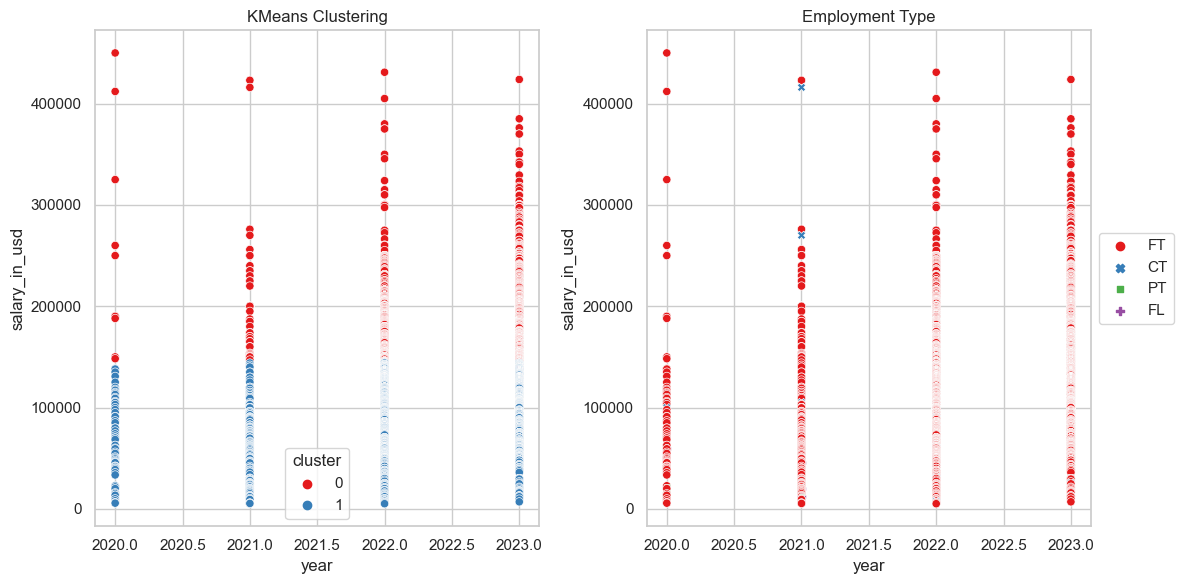

In [21]:
from sklearn.cluster import KMeans

# Apply KMeans clustering with 2 clusters
kmeans = KMeans(n_clusters=2, random_state=42)
df['cluster'] = kmeans.fit_predict(df[['salary_in_usd']])

# Plotting using Seaborn
plt.figure(figsize=(12, 6))

# Plot the clustered data using Seaborn
plt.subplot(1, 2, 1)
sns.scatterplot(data=df, x='year', y='salary_in_usd', hue='cluster', palette='Set1')
plt.title('KMeans Clustering')

# Plot employment_type on the side
plt.subplot(1, 2, 2)
sns.scatterplot(data=df, x='year', y='salary_in_usd', hue='employment_type', palette='Set1', style='employment_type')
plt.title('Employment Type')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.tight_layout()
plt.show()

## 10. Text analysis

#### Find most common words in job titles

[('Data', 2944), ('Engineer', 1640), ('Scientist', 1065), ('Analyst', 684), ('Learning', 382), ('Machine', 375), ('Analytics', 137), ('Research', 123), ('Science', 116), ('Manager', 113)]


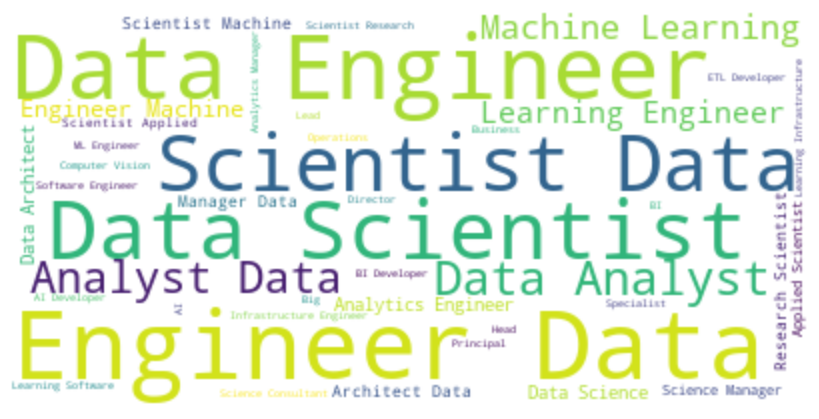

In [22]:
from wordcloud import WordCloud
from collections import Counter

# Join the words into a single string
all_words = " ".join(df['job_title'])

# Create a counter to find the most common words
common_words_counter = Counter(all_words.split())
print(common_words_counter.most_common(10))

# Generate the WordCloud
wordcloud = WordCloud(
    background_color="white", min_font_size=5
).generate(all_words)

# Plot the WordCloud image
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.tight_layout(pad=0)

# Display the WordCloud
plt.show()

# Save the WordCloud as an image
plt.savefig("img/word_cloud.png")
plt.close()